#1. Obstacle Configuration


In [2]:
n = 200
m = 200

obstacles = set()

def add_block(x1,y1,x2,y2):
    for x in range(x1, x2+1):
        for y in range(y1, y2+1):
            obstacles.add((x,y))

add_block(40,40,70,70)
add_block(90,120,130,160)
add_block(150,50,180,90)
add_block(60,150,100,190)

print(len(obstacles))


5473


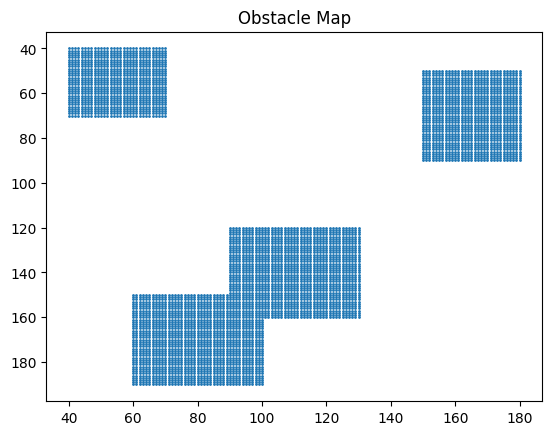

In [3]:
import matplotlib.pyplot as plt

xs=[x for x,y in obstacles]
ys=[y for x,y in obstacles]

plt.scatter(xs,ys,s=1)
plt.gca().invert_yaxis()
plt.title("Obstacle Map")
plt.show()


#2. Dijkstra’s Algorithm

In [5]:
import heapq
import math
from collections import defaultdict

moves=[(1,0),(-1,0),(0,1),(0,-1),(1,1),(1,-1),(-1,1),(-1,-1)]

def dijkstra(start,goal):
    pq=[]
    heapq.heappush(pq,(0,start))
    dist=defaultdict(lambda:math.inf)
    dist[start]=0
    visited=set()
    expanded=0
    parent={}
    while pq:
        cost,node=heapq.heappop(pq)
        if node in visited:
            continue
        visited.add(node)
        expanded+=1
        if node==goal:
            break
        x,y=node
        for dx,dy in moves:
            nx,ny=x+dx,y+dy
            if 0<=nx<=n and 0<=ny<=m and (nx,ny) not in obstacles:
                step=math.sqrt(2) if dx!=0 and dy!=0 else 1
                new_cost=cost+step
                if new_cost<dist[(nx,ny)]:
                    dist[(nx,ny)]=new_cost
                    parent[(nx,ny)]=node
                    heapq.heappush(pq,(new_cost,(nx,ny)))
    path=[]
    cur=goal
    while cur!=start:
        path.append(cur)
        cur=parent[cur]
    path.append(start)
    path.reverse()
    return dist[goal],expanded,path
start=(0,0)
goal=(200,200)

d_cost,d_nodes,d_path=dijkstra(start,goal)
print("Shortest Path Cost:",d_cost)
print("Expanded Nodes:",d_nodes)
print("Path Length:",len(d_path))
print("First few points of path:",d_path[:10])
print("Last point:",d_path[-1])


Shortest Path Cost: 301.002092041054
Expanded Nodes: 34928
Path Length: 232
First few points of path: [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0)]
Last point: (200, 200)


#3. A* Algorithm

In [7]:
def heuristic(a,b):
    dx=abs(a[0]-b[0])
    dy=abs(a[1]-b[1])
    return min(dx,dy)*math.sqrt(2)+abs(dx-dy)

def A_star(start,goal):
    pq=[]
    heapq.heappush(pq,(0,start))
    dist=defaultdict(lambda:math.inf)
    dist[start]=0
    visited=set()
    expanded=0
    parent={}
    while pq:
        cost,node=heapq.heappop(pq)
        if node in visited:
            continue
        visited.add(node)
        expanded+=1
        if node==goal:
            break
        x,y=node
        for dx,dy in moves:
            nx,ny=x+dx,y+dy
            if 0<=nx<=n and 0<=ny<=m and (nx,ny) not in obstacles:
                step=math.sqrt(2) if dx!=0 and dy!=0 else 1
                new_cost=dist[node]+step
                if new_cost<dist[(nx,ny)]:
                    dist[(nx,ny)]=new_cost
                    parent[(nx,ny)]=node
                    h=heuristic((nx,ny),goal)
                    heapq.heappush(pq,(new_cost+h,(nx,ny)))
    path=[]
    cur=goal
    while cur!=start:
        path.append(cur)
        cur=parent[cur]
    path.append(start)
    path.reverse()
    return dist[goal],expanded,path
a_cost,a_nodes,a_path=A_star((0,0),(200,200))
print("A* Total Path Cost:",a_cost)
print("A* Expanded Nodes:",a_nodes)
print("Path Length:",len(a_path))
print("First 10 path points:",a_path[:10])
print("Last Path Point:",a_path[-1])


A* Total Path Cost: 301.002092041054
A* Expanded Nodes: 8134
Path Length: 232
First 10 path points: [(0, 0), (1, 1), (2, 1), (3, 2), (4, 2), (5, 2), (6, 3), (7, 3), (8, 3), (9, 3)]
Last Path Point: (200, 200)


#My heuristic is based on diagonal distance, which represents the minimum possible cost to reach the goal if no obstacles were present. Since obstacles only increase the actual path cost and never reduce it, the heuristic cannot overestimate the true remaining cost.

#4. 4. Compare Dijkstra’s algorithm and A* in terms of:
#• Path length
#• Number of expanded nodes
#• Overall efficiency

In [9]:
print("Path Length (Dijkstra):", len(d_path))
print("Path Length (A*):", len(a_path))

print("Expanded Nodes (Dijkstra):", d_nodes)
print("Expanded Nodes (A*):", a_nodes)

print("\nOverall Efficiency:")
if a_nodes < d_nodes:
    print("A* is more efficient as it expands fewer nodes and reaches goal faster.")
else:
    print("Dijkstra expanded fewer or similar nodes, but usually A* is faster with heuristics.")


Path Length (Dijkstra): 232
Path Length (A*): 232
Expanded Nodes (Dijkstra): 34928
Expanded Nodes (A*): 8134

Overall Efficiency:
A* is more efficient as it expands fewer nodes and reaches goal faster.
